In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
df=pd.read_csv(r"D:\AI Eng\Projects\NovaGen Labs\novagen_dataset.csv")

In [3]:
df.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type__Vegan,Diet_Type__Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,2.0,26.0,111.0,198.0,99.0,72.0,4.0,1.0,5.0,5.0,...,1,2,1,0,1,False,True,True,False,False
1,8.0,24.0,121.0,199.0,103.0,75.0,2.0,1.0,2.0,9.0,...,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,10.0,-0.0,5.0,1.0,...,2,0,0,1,0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,7.0,3.0,3.0,3.0,...,1,2,1,2,0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,10.0,2.0,5.0,1.0,...,2,0,2,0,2,False,True,False,True,False


In [4]:
df.columns

Index(['Age', 'BMI', 'Blood_Pressure', 'Cholesterol', 'Glucose_Level',
       'Heart_Rate', 'Sleep_Hours', 'Exercise_Hours', 'Water_Intake',
       'Stress_Level', 'Target', 'Smoking', 'Alcohol', 'Diet', 'MentalHealth',
       'PhysicalActivity', 'MedicalHistory', 'Allergies', 'Diet_Type__Vegan',
       'Diet_Type__Vegetarian', 'Blood_Group_AB', 'Blood_Group_B',
       'Blood_Group_O'],
      dtype='object')

In [13]:
df["Target"].unique()

array([1, 0])

In [9]:
print((df['Target']==0).sum())
print((df['Target']==1).sum())

4570
4979


In [6]:
df.isnull().sum()

Age                      0
BMI                      0
Blood_Pressure           0
Cholesterol              0
Glucose_Level            0
Heart_Rate               0
Sleep_Hours              0
Exercise_Hours           0
Water_Intake             0
Stress_Level             0
Target                   0
Smoking                  0
Alcohol                  0
Diet                     0
MentalHealth             0
PhysicalActivity         0
MedicalHistory           0
Allergies                0
Diet_Type__Vegan         0
Diet_Type__Vegetarian    0
Blood_Group_AB           0
Blood_Group_B            0
Blood_Group_O            0
dtype: int64

In [28]:
X=df.drop(columns=["Target"], axis=1)
Y=df["Target"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

# Base Line Models- Logistic Regresssion

In [66]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=2000)

In [67]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuarcy score: ", accuracy_score(y_test,y_pred))
print("Classification reprt : ",classification_report(y_test,y_pred))

Accuarcy score:  0.8225130890052356
Classification reprt :                precision    recall  f1-score   support

           0       0.82      0.81      0.81       900
           1       0.83      0.84      0.83      1010

    accuracy                           0.82      1910
   macro avg       0.82      0.82      0.82      1910
weighted avg       0.82      0.82      0.82      1910



# Navie Base

In [70]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [71]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuarcy score: ", accuracy_score(y_test,y_pred))
print("Classification reprt : ",classification_report(y_test,y_pred))

Accuarcy score:  0.8209424083769633
Classification reprt :                precision    recall  f1-score   support

           0       0.80      0.83      0.81       900
           1       0.85      0.81      0.83      1010

    accuracy                           0.82      1910
   macro avg       0.82      0.82      0.82      1910
weighted avg       0.82      0.82      0.82      1910



# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)

In [78]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuarcy score: ", accuracy_score(y_test,y_pred))
print("Classification reprt : ",classification_report(y_test,y_pred))

Accuarcy score:  0.8785340314136125
Classification reprt :                precision    recall  f1-score   support

           0       0.86      0.88      0.87       900
           1       0.89      0.88      0.88      1010

    accuracy                           0.88      1910
   macro avg       0.88      0.88      0.88      1910
weighted avg       0.88      0.88      0.88      1910



In [79]:
from sklearn.svm import SVC
model=SVC()

In [80]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuarcy score: ", accuracy_score(y_test,y_pred))
print("Classification reprt : ",classification_report(y_test,y_pred))

Accuarcy score:  0.8785340314136125
Classification reprt :                precision    recall  f1-score   support

           0       0.86      0.88      0.87       900
           1       0.89      0.88      0.88      1010

    accuracy                           0.88      1910
   macro avg       0.88      0.88      0.88      1910
weighted avg       0.88      0.88      0.88      1910



# XGBoosst Classifier

In [29]:
model=xgb.XGBClassifier(
    estimator=100,
    max_depth=3,
    learning_rate=0.05,
    random_state=42
    )

In [30]:
model.fit(x_train,y_train)

C:\Users\Dexter\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:200: UserWarning: [18:20:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [31]:
y_pred=model.predict(x_test)

In [35]:
print("Accuarcy score: ", accuracy_score(y_test,y_pred))
print("Classification reprt : ",classification_report(y_test,y_pred))

Accuarcy score:  0.8984293193717278
Classification reprt :                precision    recall  f1-score   support

           0       0.91      0.87      0.89       900
           1       0.89      0.92      0.91      1010

    accuracy                           0.90      1910
   macro avg       0.90      0.90      0.90      1910
weighted avg       0.90      0.90      0.90      1910



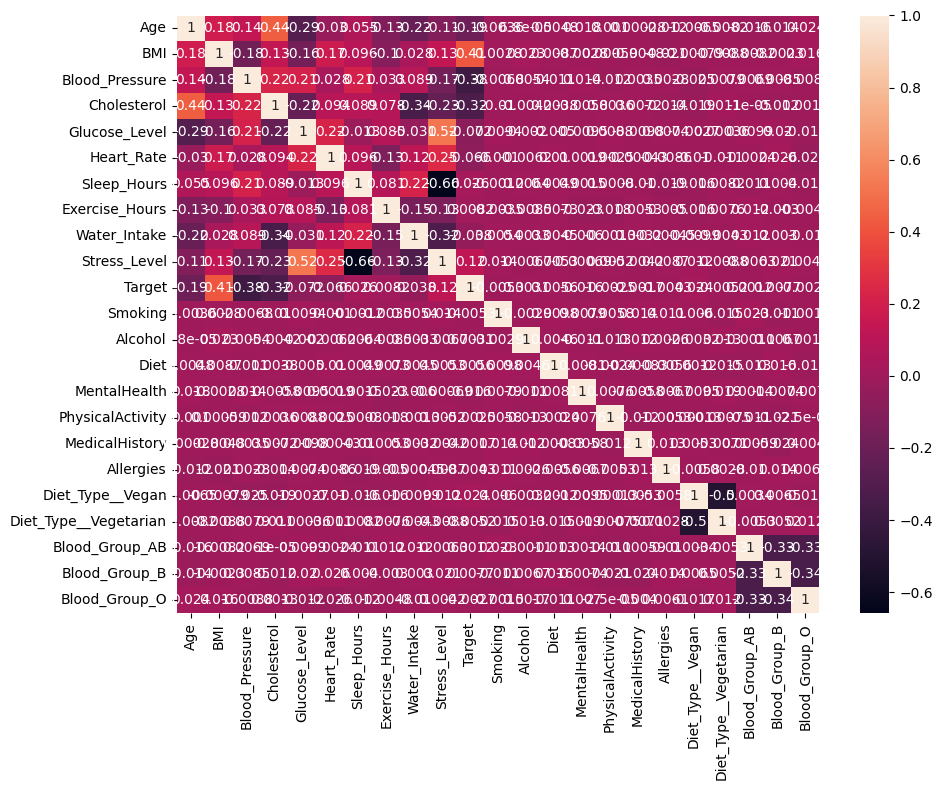

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()
plt.show()